In [1]:
# plots will be shown inline 
%matplotlib inline 
import matplotlib.pyplot as plt

import numpy
from numpy import sqrt,floor
import numpy.random as rnd

import numpy as np
import scipy as sp
from scipy import stats

from scipy.optimize import curve_fit

import pandas as pd
import random

import math

# Campo medio 1 specie

## Definizione funzioni e costanti

### Grandezze iniziali

In [ ]:
mu=0.5 #prob di scegliere 2 individui
c=0.5 #rate competizione
b=0.5 #rate nascita
d=0.5 #rate morte


N=400 #numero totale posti 
n_0=N/2 #numeroiniziale pop A

fi0=n_0/N

### Probabilità di pescare

In [ ]:
def p_AA(n):              #prob pescare AA
    return (mu*n*(n-1)/(N*(N-1)))


def p_AE(n):              #prob pescare AE
    return (2*mu*n*(N-n)/(N*(N-1)))


def p_A(n):              #prob pescare A
    return ((1-mu)*n/N)



### Probabilità di transire

In [ ]:
def Tm(n): #n-> n-1
    
    if(n<=0 or n>=N+1 ):
        return (0)
    else:
        return (c*p_AA(n)+d*p_A(n))


     
def Tp(n): #n-> n+1
    if(n<=-1 or n>=N ):
        return (0)
    else:
        return (b*p_AE(n))

### Variabili tilde

In [ ]:
ct=mu*c/(N-1)
bt=mu*d/(N-1)
dt=(1-mu)*c/N

### Variabili per mappa logistica

In [ ]:

r=2*bt-dt
a=2*(bt+ct)/N


### Eq per fi

In [ ]:
#fi=<n>/N
def dt_fi(fi):
    return(fi*(r-N*a*fi))

### Soluzione  Mappa  logistica

In [ ]:
#NA=fi*N

def logistica(t):
    ct=mu*c/(N-1)
    bt=mu*d/(N-1)
    dt=(1-mu)*c/N
    r=2*bt-dt
    a=2*(bt+ct)/N
    C=n_0/(r-a*n_0)
    return(r*C*np.exp(r*t)/(1+a*C*np.exp(r*t)))


### Runge Kutta 4

In [ ]:
def rungekutta4(f, y0, t):  
    n = len(t) 
    y = np.zeros(n)
    y[0] = y0
    for i in range(n - 1):
        h = t[i+1] - t[i]
        k1 = f(y[i])
        k2 = f(y[i] + k1 * h / 2.)
        k3 = f(y[i] + k2 * h / 2.)
        k4 = f(y[i] + k3 * h)
        y[i+1] = y[i] + (h / 6.) * (k1 + 2*k2 + 2*k3 + k4)
    return y

In [ ]:
def scegli_1o2():
    rand= rnd.random()
    if(rand<mu):
        return(2)
    else:
        return(1)

In [ ]:
#def nascita_morte(n,t_max):
 #   t=0
 #   for t in range(0, t_max, 1):
 #       scelta=scegli_1o2()     #vedo se fare interaz a 1 o 2
#
 #       if(scelta==2):            
 #           rand= rnd.random()              # se a 2 estraggo rand
 #           if(rand<=p_AA(n[t])): 
 #               n[t+1]=n[t]-1              # se AA perdo 1 individuo
 #           elif(rand>p_AA(n[t]) and rand<=p_AE(n[t])+p_AA(n[t])):
 #               n[t+1]=n[t]+1              # se AE guadagno 1 individuo
 #           else:
 #               n[t+1]=n[t]              # se EE non faccio nulla
#
 #       elif(scelta==1):  
#
 #           rand= rnd.random()              # se a 1 estraggo rand
 #           if(rand<p_A(n[t])):
 #               n[t+1]=n[t]-1              # se A perdo 1 individuo
 #           else:
 #               n[t+1]=n[t]              # se E non faccio nulla
#
    
#con rate??

#def nascita_morte(n,t_max):
#   t=0
#   for t in range(0, t_max, 1):
#       scelta=scegli_1o2()     #vedo se fare interaz a 1 o 2

#       if(scelta==2):            
#           rand= rnd.random()              # se a 2 estraggo rand
#           if(rand<=p_AA(n[t])): 
#               rand1=rnd.random()
#               if(rand1<=c):
#                   n[t+1]=n[t]-1              # se AA perdo 1 individuo
#           elif(rand>p_AA(n[t]) and rand<=p_AE(n[t])+p_AA(n[t])):
#               rand1=rnd.random()
#               if(rand1<=b):
#                   n[t+1]=n[t]+1              # se AE guadagno 1 individuo
#           else:
#               n[t+1]=n[t]              # se EE non faccio nulla

#       elif(scelta==1):  

#           rand= rnd.random()              # se a 1 estraggo rand
#           if(rand<p_A(n[t])):
#               rand1=rnd.random()
#               if(rand1<=d):
#                   n[t+1]=n[t]-1              # se A perdo 1 individuo
#           else:
#               n[t+1]=n[t]              # se E non faccio nulla

In [ ]:
def nascita_morte(n,t_max):
    t=0
    for t in range(0, t_max, 1):
        rand=rnd.random()
        #print("rand=",rand,"   Tm=",Tm(n[t]),"   tm+tp=",Tm(n[t])+Tp(n[t]),'     n=',n[t])
        
        if(rand<Tm(n[t])):
            n[t+1]=n[t]-1
            #print(t,'   Scelto 1')
            
        elif(rand>=Tm(n[t]) and rand<Tm(n[t])+Tp(n[t])):
            n[t+1]=n[t]+1
            #print(t,'   Scelto 2')
            
        else:
            n[t+1]=n[t]
            #print(t,'   Scelto 3')
            
                
           

In [ ]:
t_max=200
n=np.zeros(t_max)
n[0]=n_0
nascita_morte(n,t_max-1)

In [ ]:
def matrix(x,y):
    matrix = []
    
    for i in range(x):
        n = []

        for j in range(y):
            number = rnd.random()  
            n.insert(i,number)

        matrix.append(n)

    return matrix
    



## Inizio simulazione per MF 1 specie

In [ ]:
#simulazione N=400, 1000 samples
t_max=2000
n=np.zeros(t_max)


n[0]=n_0
ntot=np.zeros(t_max)
ntot2=np.zeros(t_max)
samples=1000

for i in range (0,samples):
    
    nascita_morte(n,t_max-1)
    ntot=ntot+n
    ntot2=ntot2+n**2
    #if (i==0):
        #print(n)
    
nMedio=ntot/samples
n2Medio=ntot2/samples
var=n2Medio-nMedio**2

#Soluzione EDO
t=np.linspace(0,t_max-1,t_max)

Na_log=logistica(t)


#grafico
plt.plot(t,nMedio,color="red",label="Estrazione Casuale")
plt.plot(t,Na_log,color="green",label="Mappa logistica")
plt.xlabel("t")
plt.ylabel(r"$N_A$")
plt.title("Mappa logistica vs estrazione a caso")
plt.grid()
plt.legend()

In [ ]:
rho=r
sigma=2*bt-dt
A=sigma-rho/fi0
#var_teo=1/(sigma-A*np.exp(-rho*t))**4*(2*sigma**2*bt*(ct+dt)*(1-np.exp(-2*rho*t))-sigma*A*(4*bt**2+10*bt*(ct+dt)+ct*dt)*np.exp(-rho*t)*(1-np.exp(-rho*t))+2*A**2*rho*(4*bt**2+4*bt*(ct*dt)+ct*dt)*t*np.exp(-2*rho*t)-A**3*(2*bt+dt)*np.exp(-2*rho*t)*(1-np.exp(-rho*t)))
#esp2*N**2-Na_log**2
#plt.plot(t,var_teo,color="blue",label="Varianza teorica")
plt.plot(t,var,color="red",label="Varianza sperimentale")
#plt.plot(t,Na_log,color="green",label="Mappa logistica")
plt.xlabel("t")
plt.ylabel(r"$V_A$")
plt.title("Mappa logistica vs estrazione a caso")
plt.grid()
plt.legend()

In [ ]:
N=10
n_0=5
samples=5000
t_max=2000
n=np.zeros(t_max)
fi0=0.5


n[0]=n_0
ntot=np.zeros(t_max)
ntot2=np.zeros(t_max)

for i in range (0,samples):
    
    nascita_morte(n,t_max-1)
    ntot=ntot+n
    
    #if (i==0):
        #print(n)
    
nMedio=ntot/samples

#Soluzione EDO
Na_log=logistica(t)


#grafico
plt.plot(t,nMedio,color="red",label="Estrazione Casuale")
plt.plot(t,Na_log,color="green",label="Mappa logistica")
plt.xlabel("t")
plt.ylabel(r"$N_A$")
plt.title("Mappa logistica vs estrazione a caso")
plt.grid()
plt.legend()

In [ ]:
N=1000
n_0=N/2
samples=500
t_max=20000
n=np.zeros(t_max)


fi0=0.5
t=np.linspace(0,t_max-1,t_max)


n[0]=n_0
ntot=np.zeros(t_max)
ntot2=np.zeros(t_max)

for i in range (0,samples):
    
    nascita_morte(n,t_max-1)
    ntot=ntot+n
    #if (i==0):
        #print(n)
    
nMedio=ntot/samples

#Soluzione EDO
Na_log=logistica(t)



#grafico
plt.plot(t,nMedio,color="red",label="Estrazione Casuale")
plt.plot(t,Na_log,color="green",label="Mappa logistica")
plt.xlabel("t")
plt.ylabel(r"$N_A$")
plt.title("Mappa logistica vs estrazione a caso")
plt.grid()
plt.legend()

### Dipendenza da N_0

In [ ]:
t_max=2000
t=np.linspace(0,t_max-1,t_max)
matrice=matrix(11,t_max)
for k in range (0,11,1):
    
    n=np.zeros(t_max)
    n[0]=k*N/10
    print(n[0])
    
    
    ntot=np.zeros(t_max)
    samples=10
    

    for i in range (0,samples):
        

        nascita_morte(n,t_max-1)
        ntot=ntot+n
        for j in range (0,t_max,1):
            matrice[k][j]=ntot[j]/samples
            
plt.plot(t,matrice[0],label="$n_0=0$")
plt.plot(t,matrice[1] ,label="$n_0=10$")
plt.plot(t,matrice[2],label="$n_0=20$")
plt.plot(t,matrice[3],label="$n_0=30$")
plt.plot(t,matrice[4],label="$n_0=40$")
plt.plot(t,matrice[5],label="$n_0=50$")
plt.plot(t,matrice[6],label="$n_0=60$")
plt.plot(t,matrice[7],label="$n_0=70$")
plt.plot(t,matrice[8],label="$n_0=80$")
plt.plot(t,matrice[9],label="$n_0=90$")
plt.plot(t,matrice[10],label="$n_0=100$")
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel("t")
plt.ylabel(r"$N_A$")
plt.title(r"Dipendenza da $n_0$")

#Calcolo valore fisso
N_fisso=N*(2*bt-ct)/(2*bt+ct)
print(N_fisso) # :-)

### Dipendenza da µ

In [ ]:

t=np.linspace(0,t_max-1,t_max)
matrice=matrix(11,t_max)
for k in range (0,11,1):
    
    n=np.zeros(t_max)
    mu=0.1*k

    n[0]=n_0
    
    
    
    ntot=np.zeros(t_max)
    samples=10
    

    for i in range (0,samples):
        

        nascita_morte(n,t_max-1)
        ntot=ntot+n
        for j in range (0,t_max,1):
            matrice[k][j]=ntot[j]/samples
            
plt.plot(t,matrice[0],label="$\mu=0$")
plt.plot(t,matrice[1] ,label="$\mu=0.1$")
plt.plot(t,matrice[2],label="$\mu=0.2$")
plt.plot(t,matrice[3],label="$\mu=0.3$")
plt.plot(t,matrice[4],label="$\mu=0.4$")
plt.plot(t,matrice[5],label="$\mu=0.5$")
plt.plot(t,matrice[6],label="$\mu=0.6$")
plt.plot(t,matrice[7],label="$\mu=0.7$")
plt.plot(t,matrice[8],label="$\mu=0.8$")
plt.plot(t,matrice[9],label="$\mu=0.9$")
plt.plot(t,matrice[10],label="$\mu=1$")
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel("t")
plt.ylabel(r"$N_A$")
plt.title(r"Dipendenza da $\mu$")

In [ ]:
mu=0.5 #torno a nomrale

### Dipendenza da b

In [ ]:

t=np.linspace(0,t_max-1,t_max)
matrice=matrix(11,t_max)
for k in range (0,11,1):
    
    n=np.zeros(t_max)
    b=0.1*k
    


    n[0]=n_0
    
    
    
    ntot=np.zeros(t_max)
    samples=10
    

    for i in range (0,samples):
        

        nascita_morte(n,t_max-1)
        ntot=ntot+n
        for j in range (0,t_max,1):
            matrice[k][j]=ntot[j]/samples
            
plt.plot(t,matrice[0],label="$b=0$")
plt.plot(t,matrice[1] ,label="$b=0.1$")
plt.plot(t,matrice[2],label="b=0.2$")
plt.plot(t,matrice[3],label="b=0.3$")
plt.plot(t,matrice[4],label="b=0.4$")
plt.plot(t,matrice[5],label="b=0.5$")
plt.plot(t,matrice[6],label="b=0.6$")
plt.plot(t,matrice[7],label="b=0.7$")
plt.plot(t,matrice[8],label="b=0.8$")
plt.plot(t,matrice[9],label="b=0.9$")
plt.plot(t,matrice[10],label="b=1$")
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel("t")
plt.ylabel(r"$N_A$")
plt.title(r"Dipendenza da $b$")
b=0.5

 ### Dipendenza da d

In [ ]:

t=np.linspace(0,t_max-1,t_max)
matrice=matrix(11,t_max)
for k in range (0,11,1):
    
    n=np.zeros(t_max)
    d=0.1*k
    

    n[0]=n_0
    
    
    
    ntot=np.zeros(t_max)
    samples=10
    

    for i in range (0,samples):
        

        nascita_morte(n,t_max-1)
        ntot=ntot+n
        for j in range (0,t_max,1):
            matrice[k][j]=ntot[j]/samples
            
plt.plot(t,matrice[0],label="$d=0$")
plt.plot(t,matrice[1] ,label="$d=0.1$")
plt.plot(t,matrice[2],label="d=0.2$")
plt.plot(t,matrice[3],label="d=0.3$")
plt.plot(t,matrice[4],label="d=0.4$")
plt.plot(t,matrice[5],label="d=0.5$")
plt.plot(t,matrice[6],label="d=0.6$")
plt.plot(t,matrice[7],label="d=0.7$")
plt.plot(t,matrice[8],label="d=0.8$")
plt.plot(t,matrice[9],label="d=0.9$")
plt.plot(t,matrice[10],label="d=1$")
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel("t")
plt.ylabel(r"$N_A$")
plt.title(r"Dipendenza da $d$")

d=0.5

### Dipendenza da c

In [ ]:

t=np.linspace(0,t_max-1,t_max)
matrice=matrix(11,t_max)
for k in range (0,11,1):
    
    n=np.zeros(t_max)
    c=0.1*k
    

    n[0]=n_0
    
    
    
    ntot=np.zeros(t_max)
    samples=10
    

    for i in range (0,samples):
        

        nascita_morte(n,t_max-1)
        ntot=ntot+n
        for j in range (0,t_max,1):
            matrice[k][j]=ntot[j]/samples
            
plt.plot(t,matrice[0],label="$c=0$")
plt.plot(t,matrice[1] ,label="$c=0.1$")
plt.plot(t,matrice[2],label="c=0.2$")
plt.plot(t,matrice[3],label="c=0.3$")
plt.plot(t,matrice[4],label="c=0.4$")
plt.plot(t,matrice[5],label="c=0.5$")
plt.plot(t,matrice[6],label="c=0.6$")
plt.plot(t,matrice[7],label="c=0.7$")
plt.plot(t,matrice[8],label="c=0.8$")
plt.plot(t,matrice[9],label="c=0.9$")
plt.plot(t,matrice[10],label="c=1$")
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel("t")
plt.ylabel(r"$N_A$")
plt.title(r"Dipendenza da $c$")

c=0.5

In [2]:
anno=np.array([1975,1976,1977,1978,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1991,1992,1993,1994,1995,1996,1997,1999])

In [3]:
pop=np.array([1649,1742,2082,2570,2864,4408,5297,4416,4216,4204,6008,4807,7600,6796,6475,8691,7761,8161,5786,6492,7191,7643])

In [ ]:
plt.plot(anno,pop,"o")
plt.grid()

In [44]:
def f(x,r,C,s):
    return(r/(s-C*np.exp(-r*x)))

initialGuess=[51,43,3]
popt, pcov=curve_fit(f,anno,pop,initialGuess,sigma=pop**0.5)

In [45]:
popt

array([2.50977151e+05, 4.30000000e+01, 6.03154698e+01])

In [46]:
pcov

array([[inf, inf, inf],
       [inf, inf, inf],
       [inf, inf, inf]])

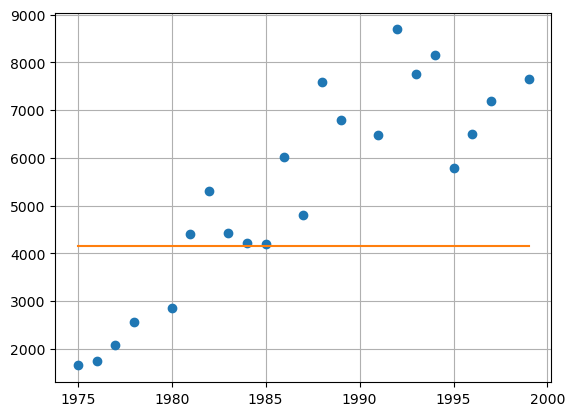

In [47]:
plt.plot(anno,pop,"o")
plt.plot(anno,f(anno,popt[0],popt[1],popt[2]),)
plt.grid()